<a href="https://colab.research.google.com/github/tricucdu/bai-tap-ai/blob/bai-tap-ann/Cnn_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPooling2D,Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir='/content/flower'
img_width,img_height=128,128
batch_size=10
train_datagen=ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')
model=Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 5 classes

])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
history = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=train_generator.samples // batch_size,
    verbose=1
)
model.save("flower_cnn_model.h5")

Found 498 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.2545 - loss: 1.7239
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.6000 - loss: 1.3507
Epoch 3/100
 3/49 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3611 - loss: 1.4588

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4420 - loss: 1.2525
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.4000 - loss: 1.4486
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.5437 - loss: 1.1383
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.8000 - loss: 1.0054
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6067 - loss: 0.9789
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.6000 - loss: 0.8683
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6237 - loss: 0.9637
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.9000 - loss: 0.5246
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6699 - loss: 0.8382
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.2000 - loss: 1.2255
Epoch 13/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7033 - loss: 0.8258
Epoch 14/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - a

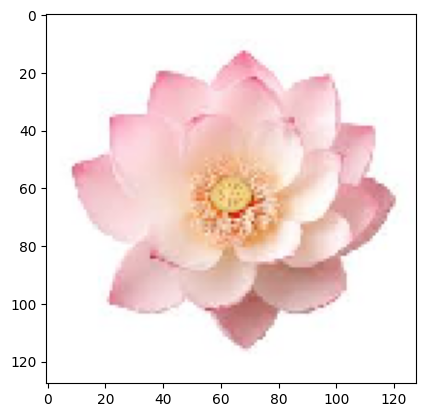

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
sen


In [4]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = load_model("/content/flower_cnn_model.h5")
path='/content/flower/sen/151.jpeg'
img=load_img(path,target_size=(128,128))
plt.imshow(img)
plt.show()
img_array=img_to_array(img)
img_array=img_array/255.0
img_array = img_array.reshape(1,128,128,3)
prediction=np.argmax(model.predict(img_array))
class_labels={v:k for k,v in train_generator.class_indices.items()}
person_name=class_labels[prediction]
print(person_name)

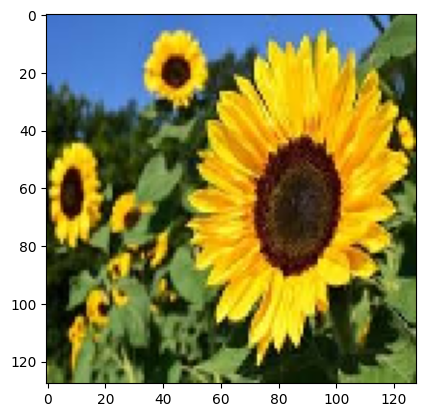

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
huong duong


In [5]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = load_model("/content/flower_cnn_model.h5")
path='/content/flower/huong duong/100.jpeg'
img=load_img(path,target_size=(128,128))
plt.imshow(img)
plt.show()
img_array=img_to_array(img)
img_array=img_array/255.0
img_array = img_array.reshape(1,128,128,3)
prediction=np.argmax(model.predict(img_array))
class_labels={v:k for k,v in train_generator.class_indices.items()}
person_name=class_labels[prediction]
print(person_name)

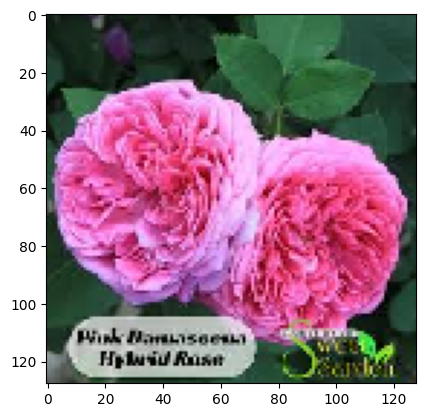

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Rosa damascena


In [6]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = load_model("/content/flower_cnn_model.h5")
path='/content/flower/Rosa damascena/11.jpeg'
img=load_img(path,target_size=(128,128))
plt.imshow(img)
plt.show()
img_array=img_to_array(img)
img_array=img_array/255.0
img_array = img_array.reshape(1,128,128,3)
prediction=np.argmax(model.predict(img_array))
class_labels={v:k for k,v in train_generator.class_indices.items()}
person_name=class_labels[prediction]
print(person_name)

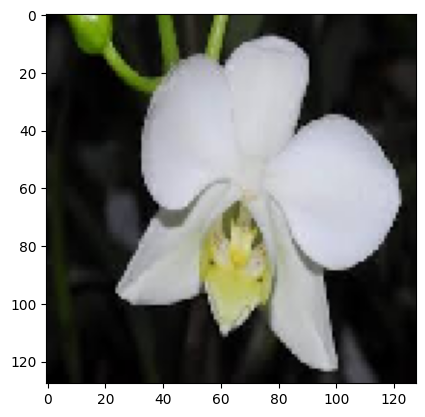

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Phalaenopsis aphrodite


In [8]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = load_model("/content/flower_cnn_model.h5")
path='/content/flower/Phalaenopsis aphrodite/103.jpeg'
img=load_img(path,target_size=(128,128))
plt.imshow(img)
plt.show()
img_array=img_to_array(img)
img_array=img_array/255.0
img_array = img_array.reshape(1,128,128,3)
prediction=np.argmax(model.predict(img_array))
class_labels={v:k for k,v in train_generator.class_indices.items()}
person_name=class_labels[prediction]
print(person_name)

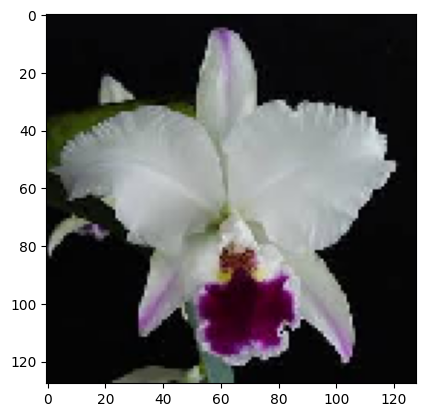

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Cattleya labiata


In [9]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = load_model("/content/flower_cnn_model.h5")
path='/content/flower/Cattleya labiata/202.jpeg'
img=load_img(path,target_size=(128,128))
plt.imshow(img)
plt.show()
img_array=img_to_array(img)
img_array=img_array/255.0
img_array = img_array.reshape(1,128,128,3)
prediction=np.argmax(model.predict(img_array))
class_labels={v:k for k,v in train_generator.class_indices.items()}
person_name=class_labels[prediction]
print(person_name)